Please enter a .csv (omit the '.csv'): Plantdata
Temp v. Height:
0.051759280744766295
Rain v. Height:
0.1399866177094531
Altitude v. Height:
0.0020256217736884666
Site v. Height:
1.9973869701713844e-05


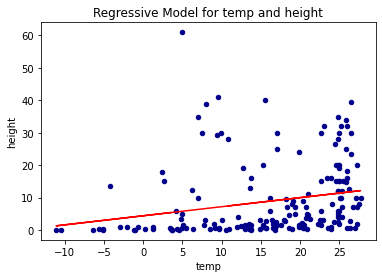

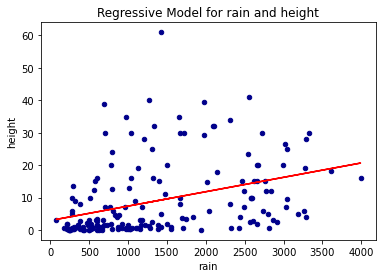

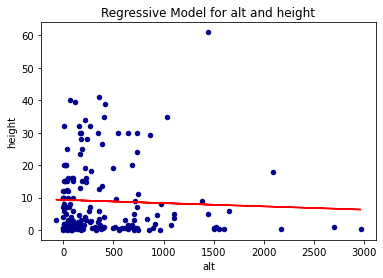

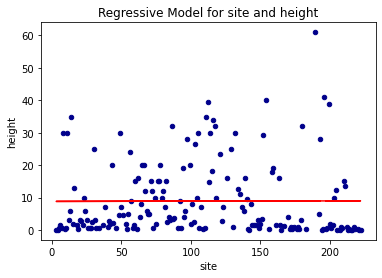

In [20]:
# Project by Eythan Jenkins
# Due: 11/05/21
# <><><><><><><><><><>
# Regression Lab 3: This lab looks at linear regressions across multiple variables within a
#    .csv file. It will first plot the data from a category in a scatterplot, then it will
#    draw a line of best fit on that scatterplot. Finally, it will produce an r squared value
#    to determine if the line of best fit is representative of a weak or strong correlation, if any.
# <><><><><><><><><><>
# Functions used:
# main(): The main will orchestrate all of the functions; it also is the site for print statements
#    and will create the different instances of each of the scatterplot 
# getCSV(): getCSV will read in a CSV, and by using Pandas, save it as a dataFrame.
# getLineBestFit(): By using NUmpys, getLineBestFit will get the coefficients for a linear line of 
#    best fit based on the variables it is passed in
# makeScatter(): This will actually make the scatterplot
# getRSquared():
# <><><><><><><><><><>
# Imports used: csv, pandas, numpy
import csv
import pandas as pd
import numpy as np


#____________________________________________________________________________
# main() will orchestrate the program, use other functions to get the most popular entries
def main():
# Gets all of the entries from a csv file, gets the final index(index of columns)
    dataFrame = getCSV()
    finalIndex = (len(dataFrame.columns))
# Creates Scatterplots, gets r squared
    print("Temp v. Height:")
    bestFitTemp = getLineBestFit(dataFrame,'temp','height')
    makeScatter(dataFrame,'temp','height', bestFitTemp, finalIndex)
    print(str(getRSquared(dataFrame,'temp','height', finalIndex) ))
    
    print("Rain v. Height:")
    bestFitRain = getLineBestFit(dataFrame,'rain','height')
    makeScatter(dataFrame, 'rain','height', bestFitRain, finalIndex)
    print(str(getRSquared(dataFrame,'rain', 'height', finalIndex) ))
    
    print("Altitude v. Height:")
    bestFitAlt = getLineBestFit(dataFrame, 'alt', 'height')
    makeScatter(dataFrame, 'alt','height', bestFitAlt, finalIndex)
    print(str(getRSquared(dataFrame, 'alt', 'height', finalIndex) ))
    
    print("Site v. Height:")
    bestFitSite = getLineBestFit(dataFrame, 'site', 'height')
    makeScatter(dataFrame, 'site','height', bestFitSite, finalIndex)
    print(str(getRSquared(dataFrame,'site', 'height', finalIndex) ))

#____________________________________________________________________________
# getCSV() will get a CSV value from the relative folder. It will return a proper CSV file
def getCSV():
    try:
        return pd.read_csv(input("Please enter a .csv (omit the '.csv'): ")+".csv")
    except:
        print("Invalid input...")
        return(getCSV())
        
#____________________________________________________________________________
# getLineBestFit() will take in the dataFrame, an X value, and a Y value. It will use these
# parameters in order to find a line of best fit to be used in the Scatterplot operation.    
def getLineBestFit(dataFrame,graphXVal,graphYVal):
    try:
# Calculates coefficient of a linear regressive model (hence the 1)
        linearCoeff = np.polyfit(dataFrame[graphXVal],dataFrame[graphYVal],1)
        return np.poly1d(linearCoeff)
    except:
        print("Error with line of best fit")
#____________________________________________________________________________
# makeScatter() will take in the dataFrame, an X value, a Y value, the bestFit, and finalIndex. 
# It will use these parameters in order to create a Scatterplot and display it. 
def makeScatter(dataFrame, graphXVal, graphYVal, bestFit, finalIndex):
    try:
# Makes New Entry, inserts as 'lineBest'+graphXVal+graphYVal for a unique variable name each instance
# Inserts at final index to keep track of where the LOBF data will be saved to
        dataFrame.insert(finalIndex,'lineBest'+graphXVal+graphYVal, bestFit(dataFrame[graphXVal]))
# Scatterplot
        ax = dataFrame.plot.scatter(title = "Regressive Model for "+str(graphXVal)+" and "+str(graphYVal),
                                    x= graphXVal, 
                                    y= graphYVal, 
                                    c= 'DarkBlue')
# Adds Line of Best Fit to the Scatterplot by accessing the inserted information from before
        dataFrame.plot(x= graphXVal, 
                       y=('lineBest'+graphXVal+graphYVal),
                       color='Red', 
                       legend =False, 
                       ax=ax)
    except:
        print("Error with creating Scatterplot")

#____________________________________________________________________________
# getRSquared will attain the r2 value through use of the dataframe and numpys. It will return the 
# r2 value to the main()
def getRSquared(dataFrame, graphXVal, graphYVal,finalIndex):
    try:
# Gets the values of the scatter data (height) and the line of best fit
        actualValues = dataFrame[graphYVal]
        lineBestFitValues = dataFrame.iloc[:, finalIndex]
# Removes the data of the final index, so that it can be refilled by new values later
        dataFrame.drop(index = finalIndex)
# USes numpy to get the correlation, which is then squared to attain rSquared. Returns it
        correlationMatrix = np.corrcoef(actualValues, lineBestFitValues)
        correlation = correlationMatrix[0,1]
        rSquared = correlation**2
        return rSquared
    except:
        print("Error in getting R2 value")
        
#<><><><><><><><><><><><><><><><><><>        
# Starts Program
main()